In [ ]:
from matplotlib import pyplot as plt
from slab import datamanagement
from slab import dsfit
from slab import dataanalysis
from slab.datamanagement import SlabFile
from numpy import *
%matplotlib inline
%config InlineBackend.figure_format='retina'
from tabulate import tabulate

data_dir = r'S:\_Data\160216 -M007 Trident Hybrid Coupler setup\data'
exp_dir = r'S:\_Data\160216 -M007 Trident Hybrid Coupler setup\experiment'
nbfig_dir = r'C:\Users\slab\Google Drive\grad school\schuster lab\Analysis\IPython Notebooks\Figures'

sys.path.append(exp_dir)
sys.path.append(r'C:\Users\slab\Google Drive\grad school\schuster lab')
from data_cache import dataCacheProxy
from Analysis.Modules import common, fit, anal, static_surface, trap_analysis

In [ ]:
reload(trap_analysis)

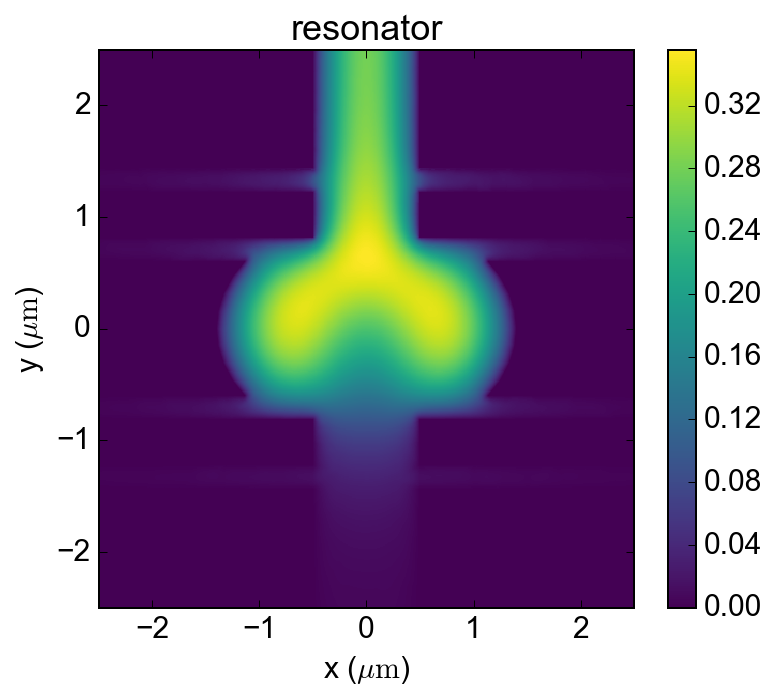

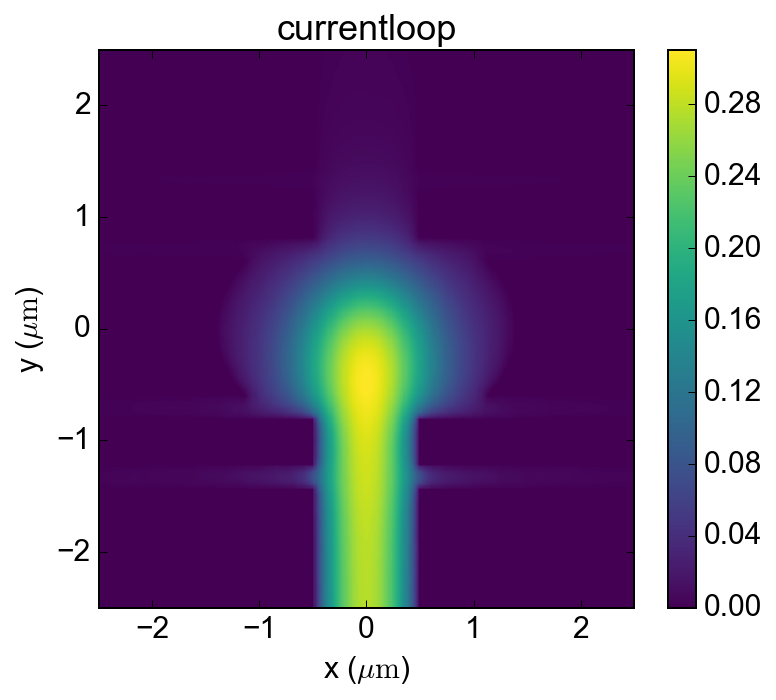

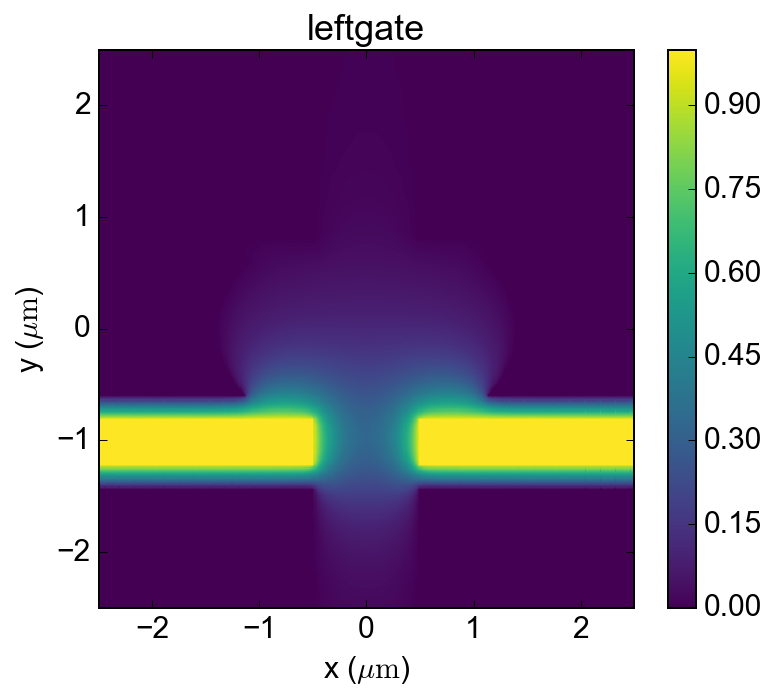

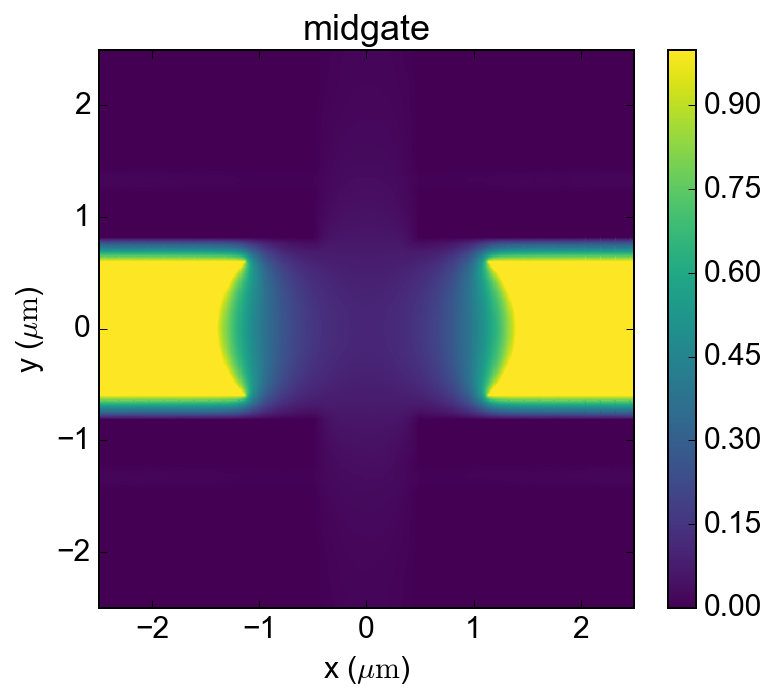

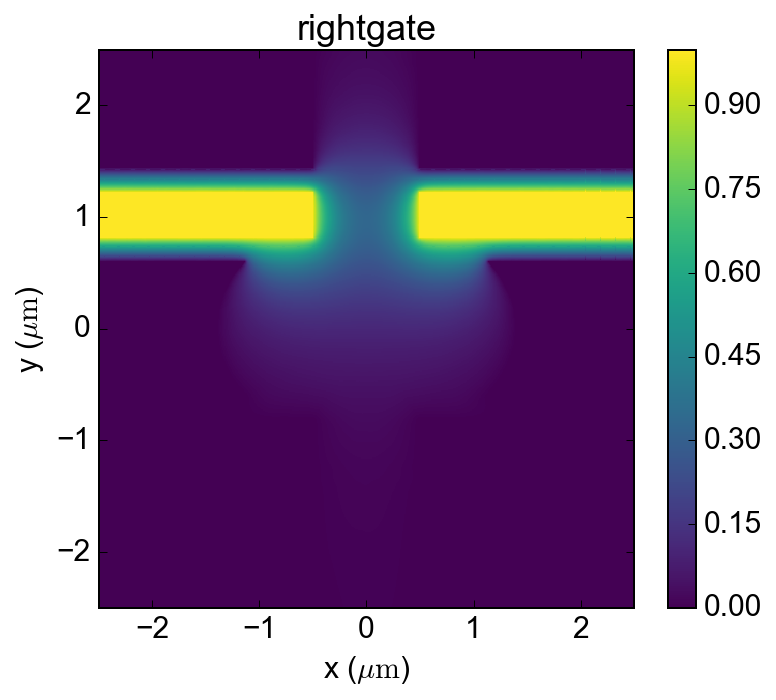

In [3]:
base_path = r'S:\Gerwin\Electron on helium\Maxwell\M016 Sweet Spot Exploration\0.1 pct accuracy'

fn_resonator = os.path.join(base_path, r'resonator_1V.fld')
fn_currentloop = os.path.join(base_path, r'currentloop_1V.fld')
fn_midgate = os.path.join(base_path, r'guard_center_1V.fld')
fn_rightgate = os.path.join(base_path, r'guard_right_1V.fld')
fn_leftgate = os.path.join(base_path, r'guard_left_1V.fld')

dicts = trap_analysis.load_potentials(fn_resonator, fn_currentloop, fn_leftgate, fn_midgate, fn_rightgate)
resonator, currentloop, leftgate, midgate, rightgate = dicts

In [4]:
potentials = [resonator, currentloop, rightgate, leftgate, midgate]
x, y, cropped_potentials = trap_analysis.crop_potentials(potentials, xdomain=(-2E-6, 2E-6), ydomain=(-1E-6, 1E-6))

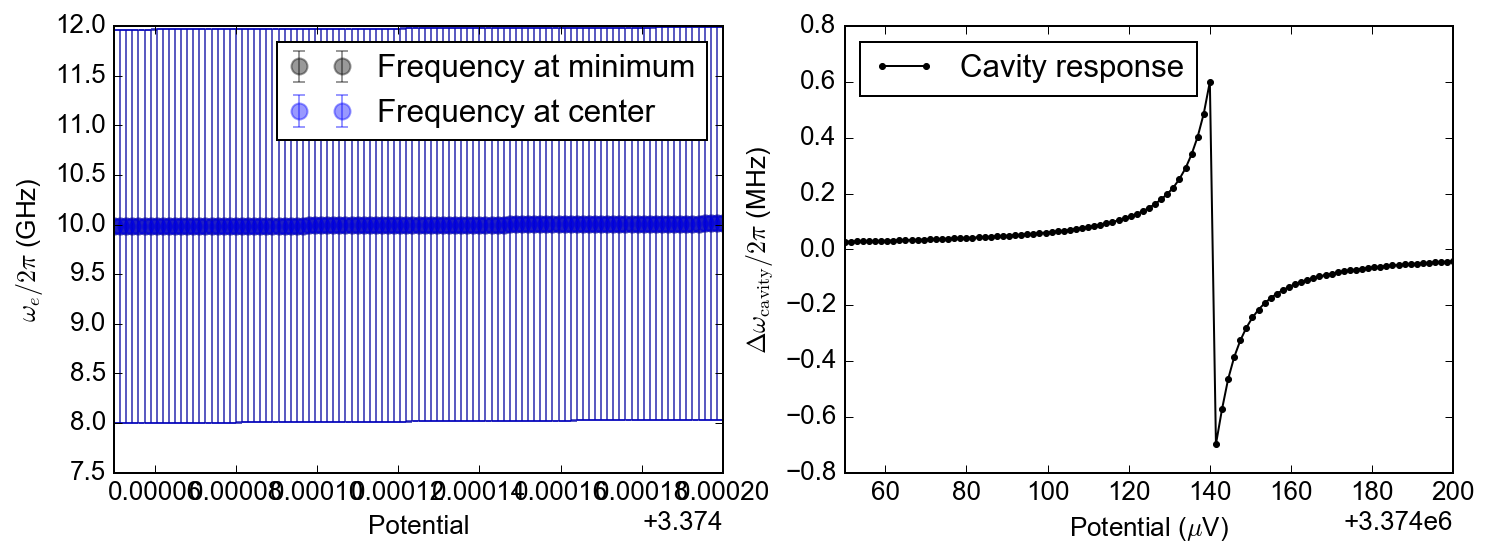

In [49]:
sweep_voltage = linspace(3.37405, 3.37420, 101)
coefficients = array([3.0, 0.50, -4.30, -3.0, 0])*2
cavity_props = {'P' : -80, 'f0' : 10E9, 'Q' : 1E4, 'beta' : 0.2433}
fmin, sigmamin, fctr, sigmactr = trap_analysis.sweep_electrode_voltage(x, y, cropped_potentials, coefficients, 
                                                                       sweep_voltage, sweep_electrode_idx=1, 
                                                                       fitdomain=(-0.5E-6, 0.5E-6), clim=(-1,1), 
                                                                       do_plot=False, print_report=False, 
                                                                       **cavity_props)

=====  =============  =============
  V     f_min (GHz)    f_ctr (GHz)
=====  =============  =============
3.374     40.441           nan
=====  =============  =============


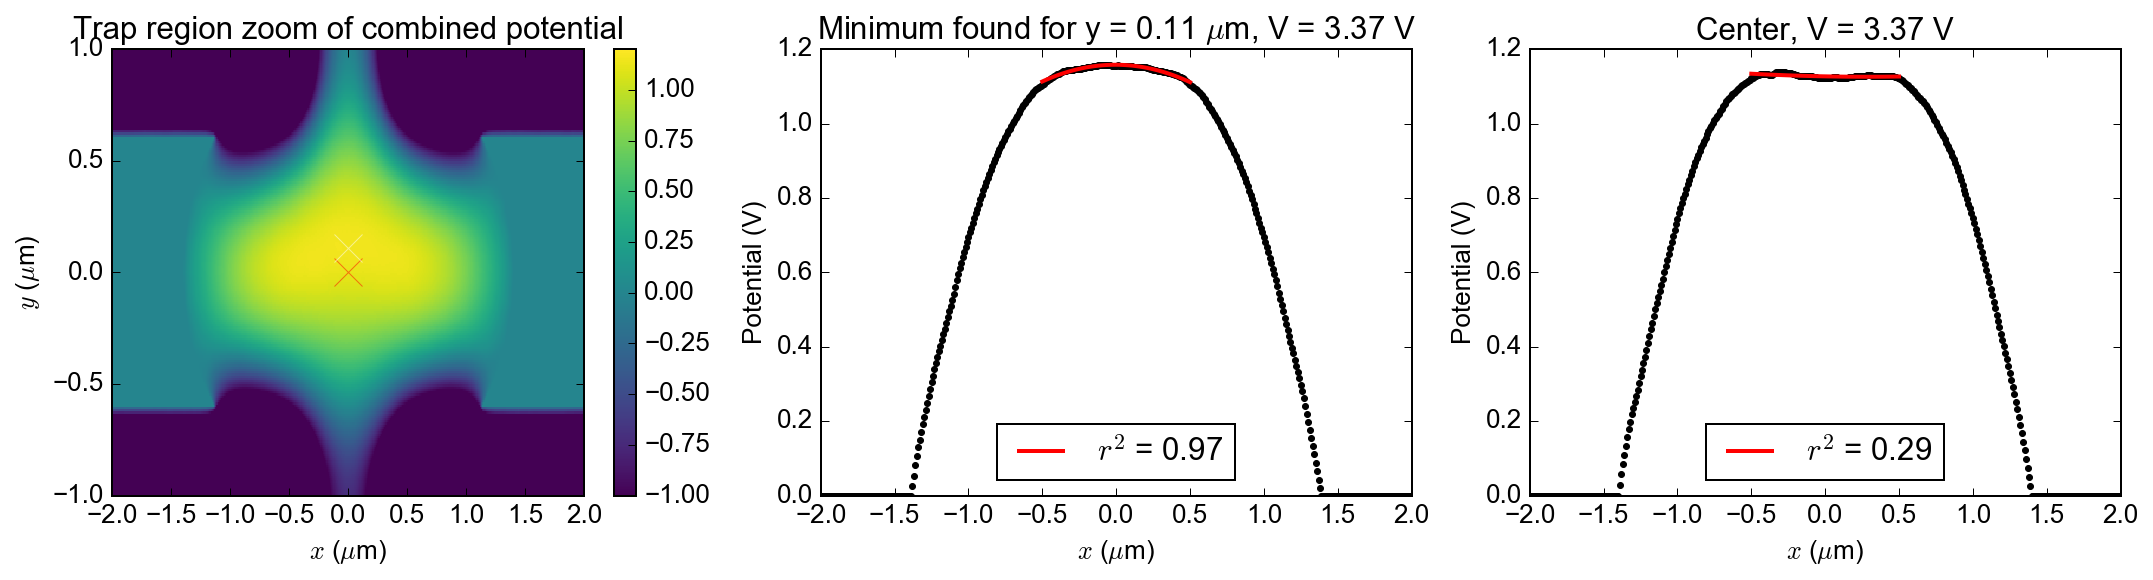

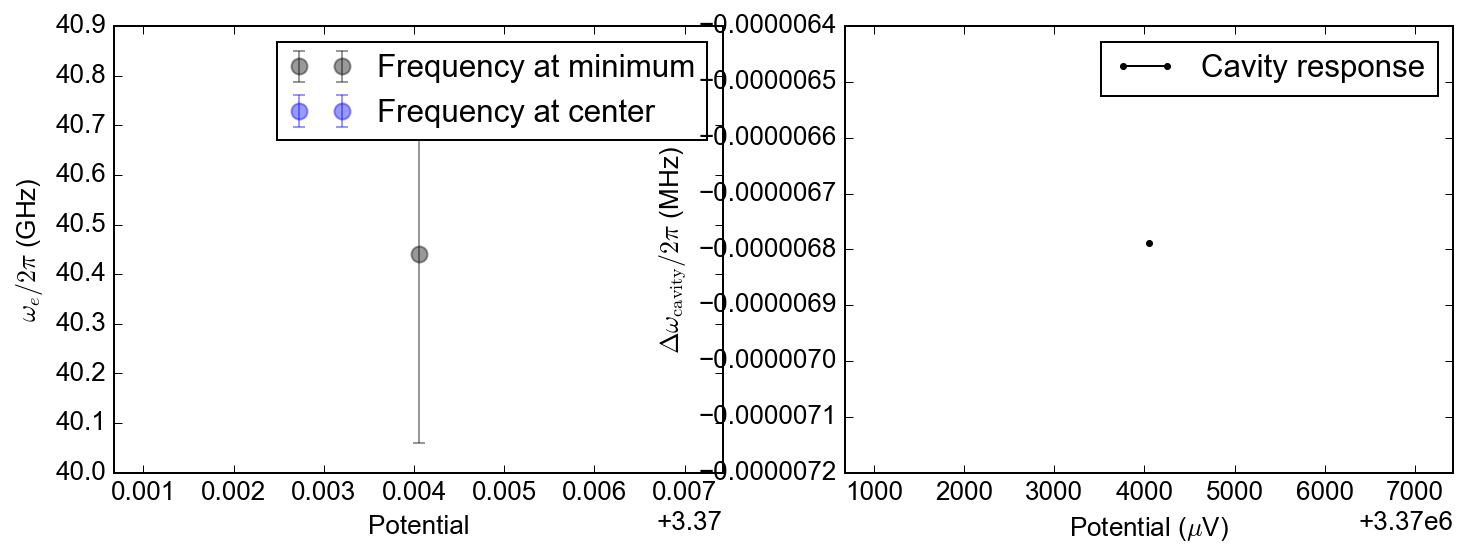

In [17]:
sweep_voltage = linspace(3.37405, 3.37420, 1)
coefficients = array([3.0, 0.50, -3.0, -3.0, 0])*2
cavity_props = {'P' : -80, 'f0' : 10E9, 'Q' : 1E4, 'beta' : 0.2433}
fmin, sigmamin, fctr, sigmactr = trap_analysis.sweep_electrode_voltage(x, y, cropped_potentials, coefficients, 
                                                                       sweep_voltage, sweep_electrode_idx=1, 
                                                                       fitdomain=(-0.5E-6, 0.5E-6), clim=(-1,1.2), 
                                                                       do_plot=True, print_report=True, 
                                                                       **cavity_props)

## Updated design (March 24th 2016)

In [109]:
def draw_rect(d, w, center=10E-6):
    plt.plot([center-w/2., center+w/2., center+w/2.,  center-w/2., center-w/2.], [0, 0, d, d, 0], '-k')

### What is the corresponding resonator frequency for 1 $\mu$m features

This is for the following properties: 
* Etch thickness: 900 nm
* Pin thickness: 80 nm
* Gap width: 1 um
* Ground plane gap: 1 um 
* Pin width: 1.2 um

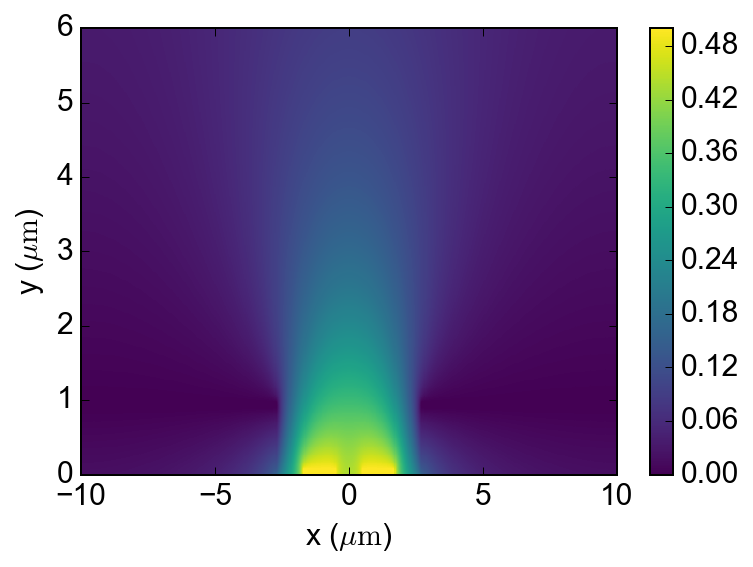

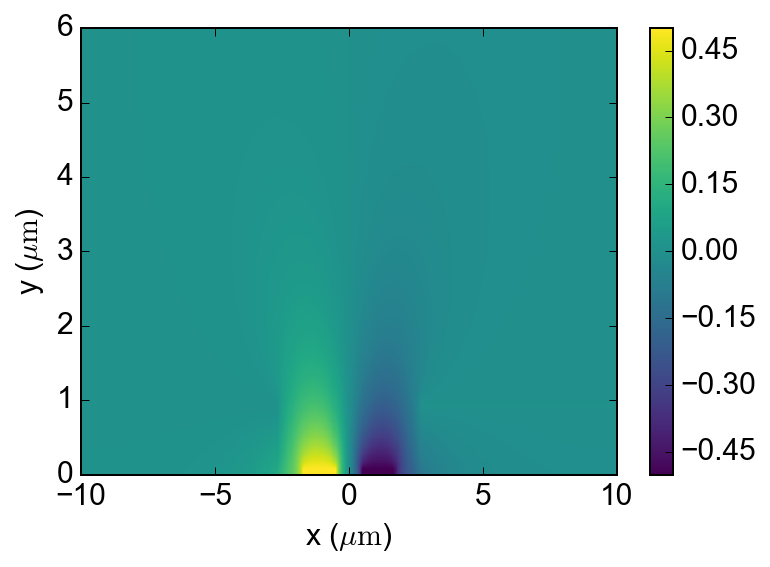

In [183]:
# The potential here is when +0.5 V is applied to both electrodes. In the calculation we take that into account 
# by multiplying the potential by 2V, where V is the actual voltage that is appled to the DC bias port.
path = r'S:\Gerwin\Electron on helium\Maxwell\M016 Capacitance Inductance\Electron frequency on top of resonator\1p2um_pinw_1um_gap_0p9um_etchT'

fn = r'Common_mode.fld'
x, y, Vcom = static_surface.load_maxwell_data(os.path.join(path, fn), do_log=False, figsize=(6.,4.), cmap=plt.cm.viridis)

fn = r'Differential_mode.fld'
x, y, Vdiff = static_surface.load_maxwell_data(os.path.join(path, fn), do_log=False, figsize=(6.,4.), cmap=plt.cm.viridis)

In [198]:
h = 825E-9
pinw = 1.2
gapw = 1.0

zidx = common.find_nearest(y, h)
voltage = 0.6
V = 2*voltage*Vcom[:,zidx]
X = x[:,zidx]*1E6
Y = y[zidx,:]*1E6

Ex = -diff(Vdiff[:,zidx])/diff(X)
Ey = -diff(Vdiff, axis=1)[:,zidx]/diff(Y)[0]

f = 7.799 +/- 0.167 GHz


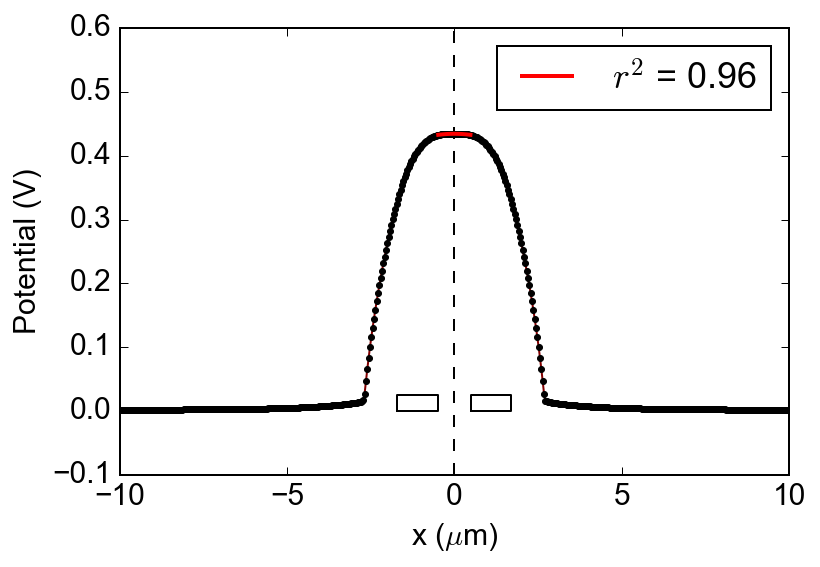

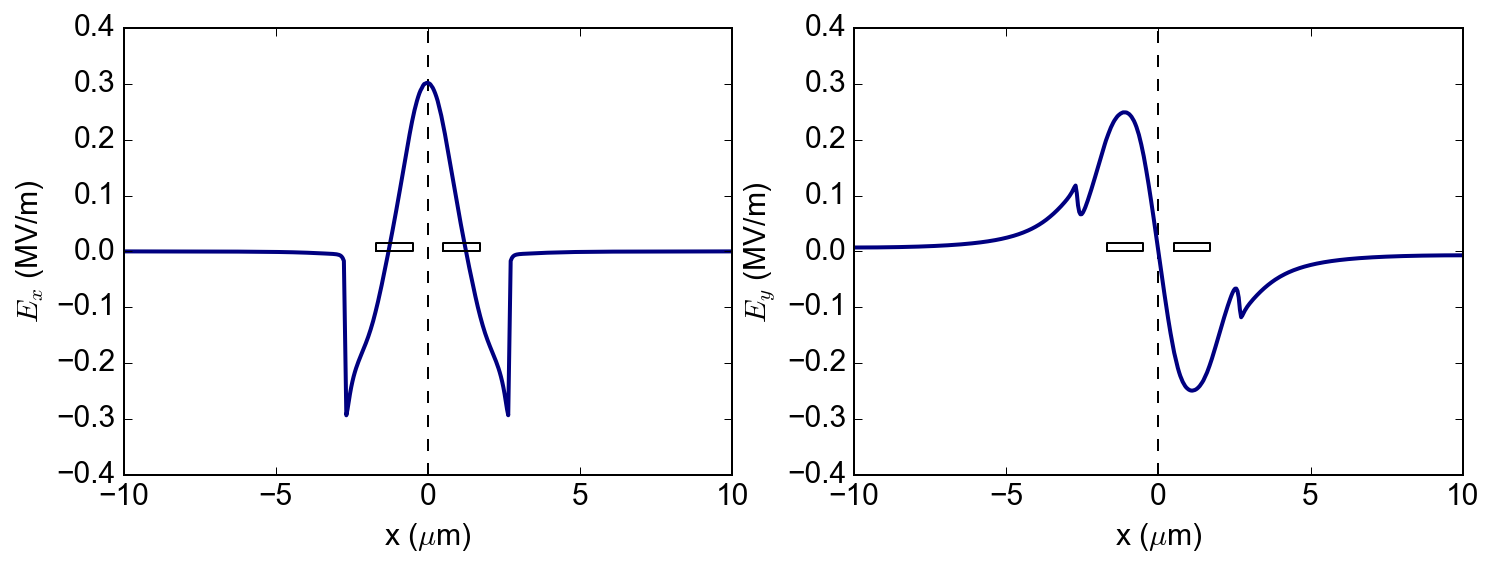

In [199]:
plt.figure()
plt.plot(X, V, color='maroon')
plt.ylim(-0.1, voltage)
plt.xlim(min(X), max(X))
plt.title('$h$ = %.2f $\mu$m, Feature size: 1 $\mu$m'%(h*1E6))

fr, ferr = trap_analysis.fit_electron_potential(X, V, fitdomain=(X[argmax(V)]-0.5, X[argmax(V)]+0.5), do_plot=True)
trap_analysis.get_electron_frequency(fr, ferr, verbose=True)
plt.xlabel("x ($\mu$m)")
plt.ylabel("Potential (V)")
plt.vlines(X[argmax(V)], ymin=-0.1, ymax=3.0, colors='k', linestyles='--')
draw_rect(0.025, pinw, center=-(pinw/2. + gapw/2.))
draw_rect(0.025, pinw, center=pinw/2. + gapw/2.)


plt.figure(figsize=(12.,4.))
plt.subplot(121)
plt.plot(X[:-1], Ex, color='navy', lw=2.0)
plt.vlines(X[argmax(V)], ymin=-0.4, ymax=0.4, colors='k', linestyles='--')
plt.ylim(-0.4, 0.4)
plt.xlabel("x ($\mu$m)")
plt.ylabel("$E_x$ (MV/m)")
draw_rect(0.015, pinw, center=-(pinw/2. + gapw/2.))
draw_rect(0.015, pinw, center=pinw/2. + gapw/2.)


plt.subplot(122)
plt.plot(X, Ey, color='navy', lw=2.0)
plt.vlines(X[argmax(V)], ymin=-0.4, ymax=0.4, colors='k', linestyles='--')
plt.ylim(-0.4, 0.4)
plt.xlabel("x ($\mu$m)")
plt.ylabel("$E_y$ (MV/m)")
draw_rect(0.015, pinw, center=-(pinw/2. + gapw/2.))
draw_rect(0.015, pinw, center=pinw/2. + gapw/2.)

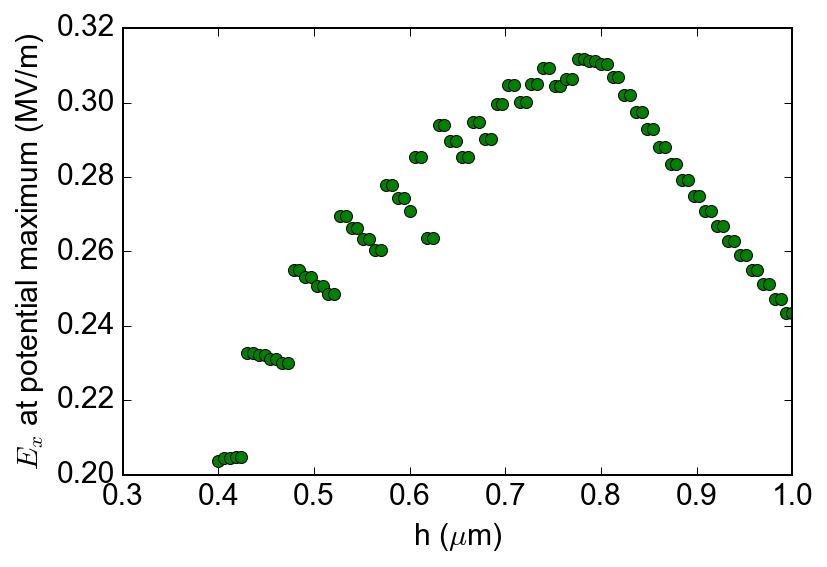

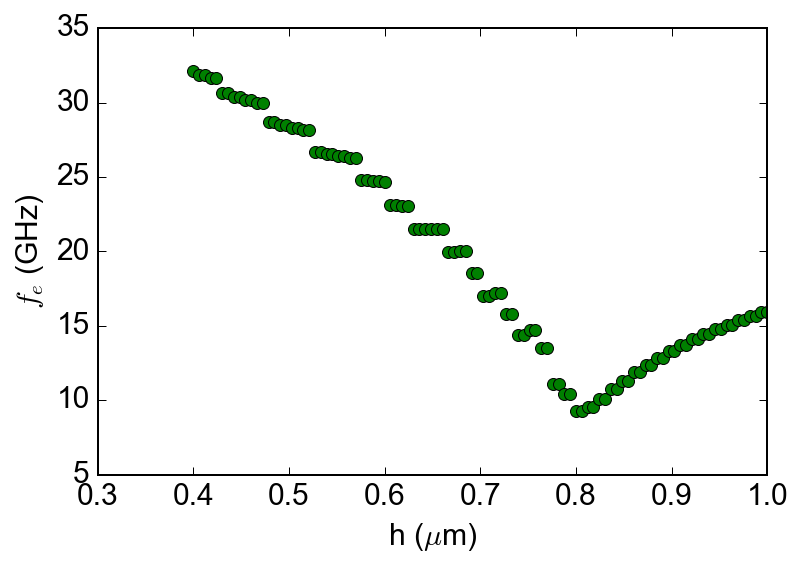

In [200]:
hs = linspace(0.4E-6, 1.0E-6, 1E2)
Electric_field, fs = list(), list()

for H in hs: 
    
    zidx = common.find_nearest(y, H)
    voltage = 1.0
    V = 2*voltage*Vcom[:,zidx]
    X = x[:,zidx]*1E6

    Ex = -diff(Vdiff[:,zidx])/diff(X)
    
    Electric_field.append(Ex[argmax(V)])
    fr, ferr = trap_analysis.fit_electron_potential(X, V, fitdomain=(X[argmax(V)]-0.5, X[argmax(V)]+0.5), do_plot=False)
    f, sigma_f = trap_analysis.get_electron_frequency(fr, ferr, verbose=False)
    
    fs.append(f)

plt.figure()
plt.plot(hs*1E6, Electric_field, 'og')
plt.ylabel('$E_x$ at potential maximum (MV/m)')
plt.xlabel('h ($\mu$m)')

plt.figure()
plt.plot(hs*1E6, array(fs)/1E9, 'og')
plt.ylabel('$f_e$ (GHz)')
plt.xlabel('h ($\mu$m)')

In [ ]:
diff(fs)/diff(hs) /1E6 * 1E-9 # Sensitivity in MHz/nm as a function of height.

### Trap region

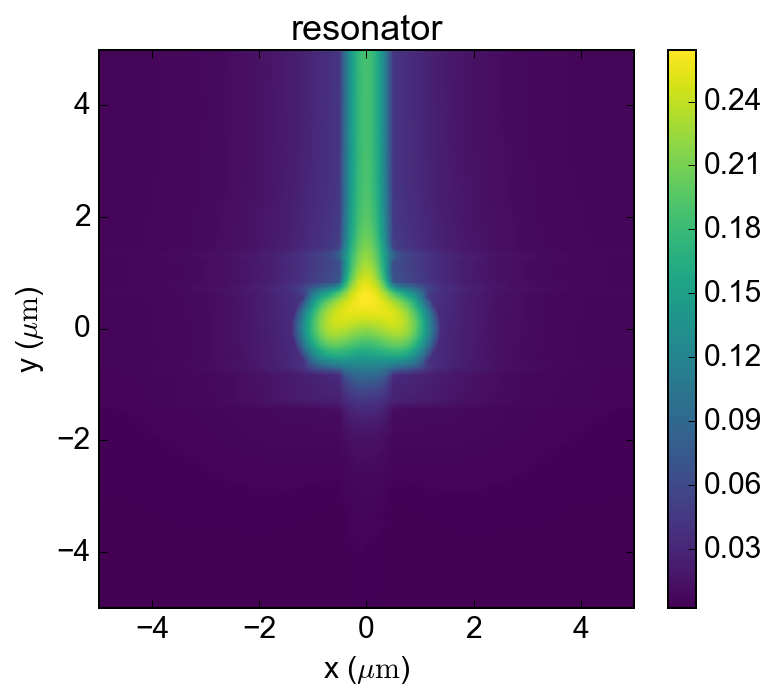

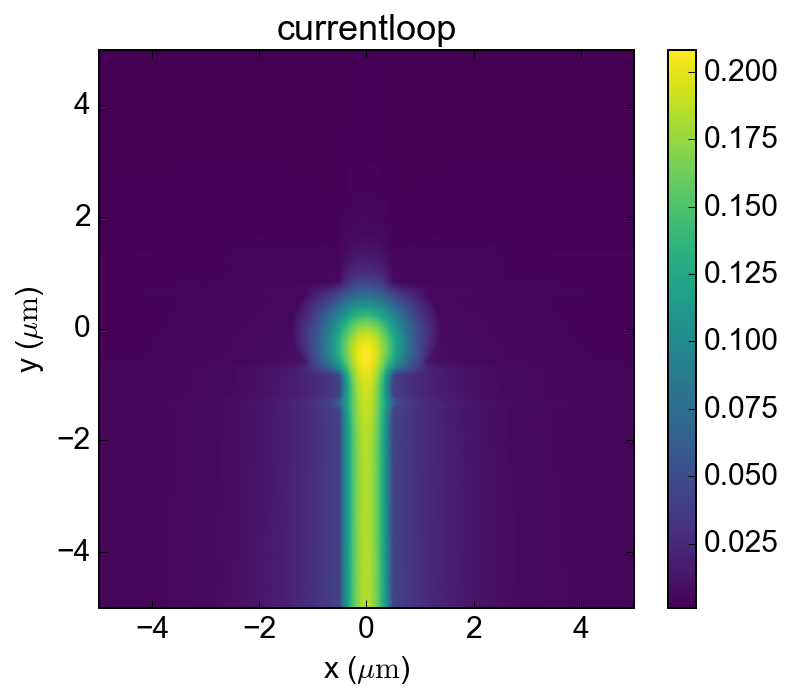

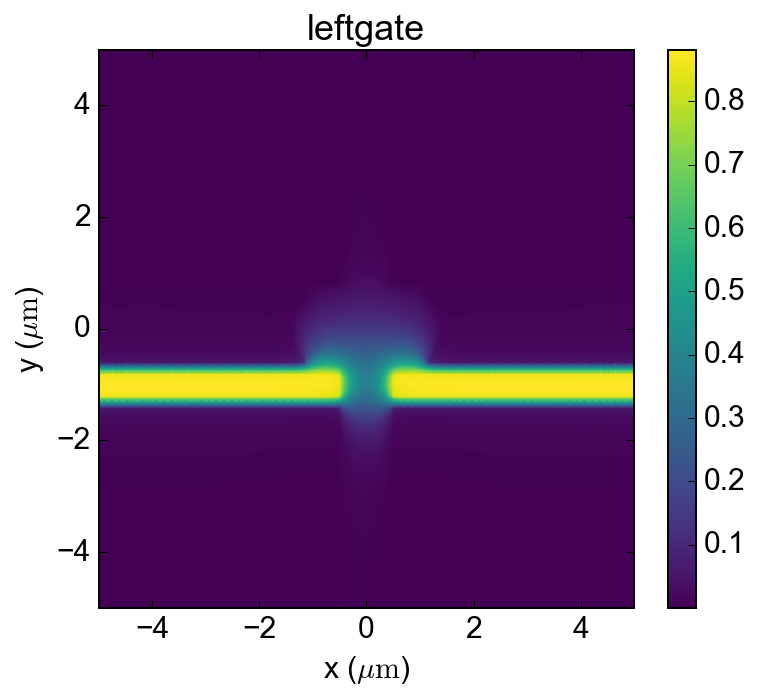

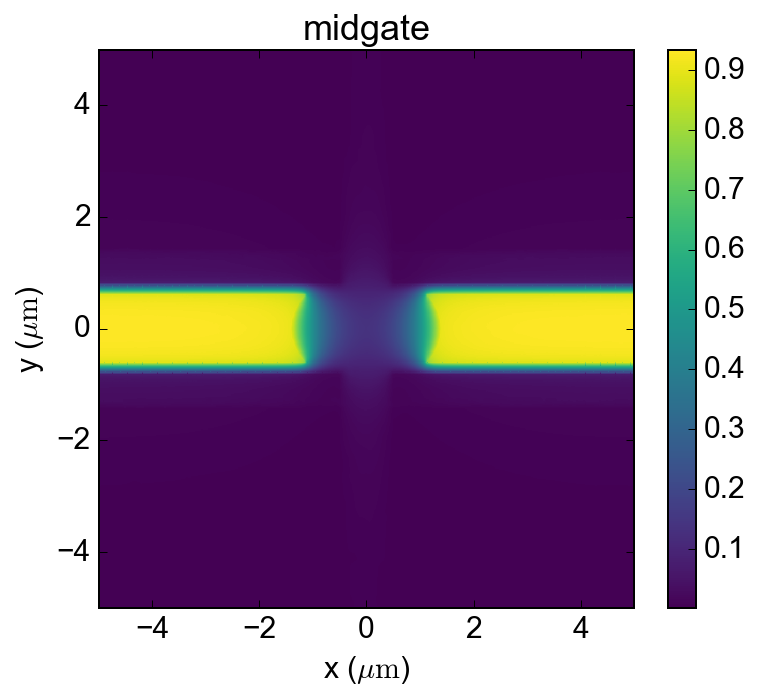

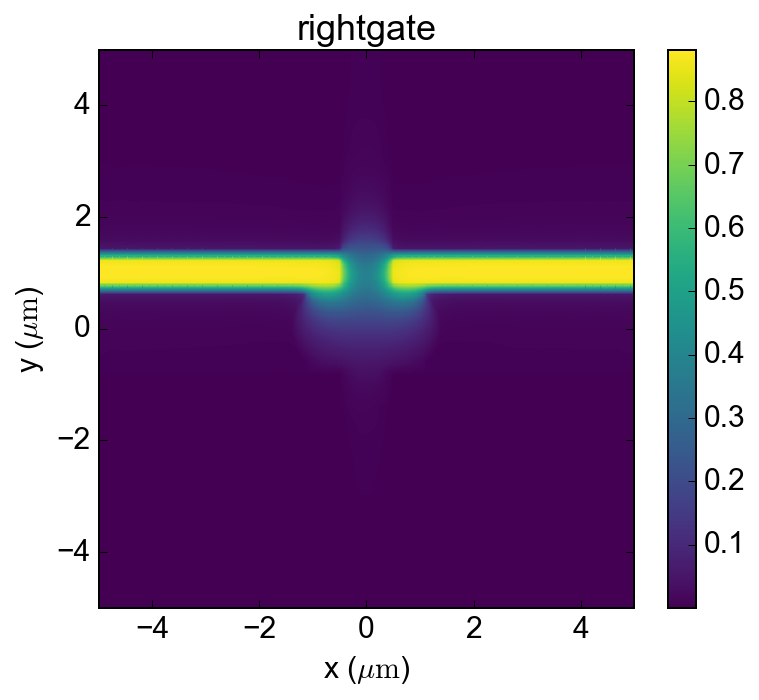

In [4]:
base_path = r'S:\Gerwin\Electron on helium\Maxwell\M016 Capacitance Inductance\Electron frequency on top of resonator\1p2um_pinw_1um_gap_0p9um_etchT'

fn_resonator = os.path.join(base_path, r'TrapRegion_Resonator_Excited.fld')
fn_currentloop = os.path.join(base_path, r'TrapRegion_CLoop_Excited.fld')
fn_midgate = os.path.join(base_path, r'TrapRegion_CenterGate_Excited.fld')
fn_rightgate = os.path.join(base_path, r'TrapRegion_ResonatorGate_Excited.fld')
fn_leftgate = os.path.join(base_path, r'TrapRegion_CLoopGate_Excited.fld')

dicts = trap_analysis.load_potentials(fn_resonator, fn_currentloop, fn_leftgate, fn_midgate, fn_rightgate)
resonator, currentloop, leftgate, midgate, rightgate = dicts

In [5]:
potentials = [resonator, currentloop, rightgate, leftgate, midgate]
x, y, cropped_potentials = trap_analysis.crop_potentials(potentials, xdomain=(-2E-6, 2E-6), ydomain=(-1E-6, 1E-6))

=====  =============  =============
  V     f_min (GHz)    f_ctr (GHz)
=====  =============  =============
1.600       nan           5.401
1.610       nan           7.114
1.620       nan           8.488
1.630       nan           9.669
1.640       nan          10.720
1.650     11.678         11.678
1.660     12.562         12.562
1.670     13.388         13.388
1.680     14.166         14.166
1.690     14.904         14.904
1.700     15.606         15.606
=====  =============  =============


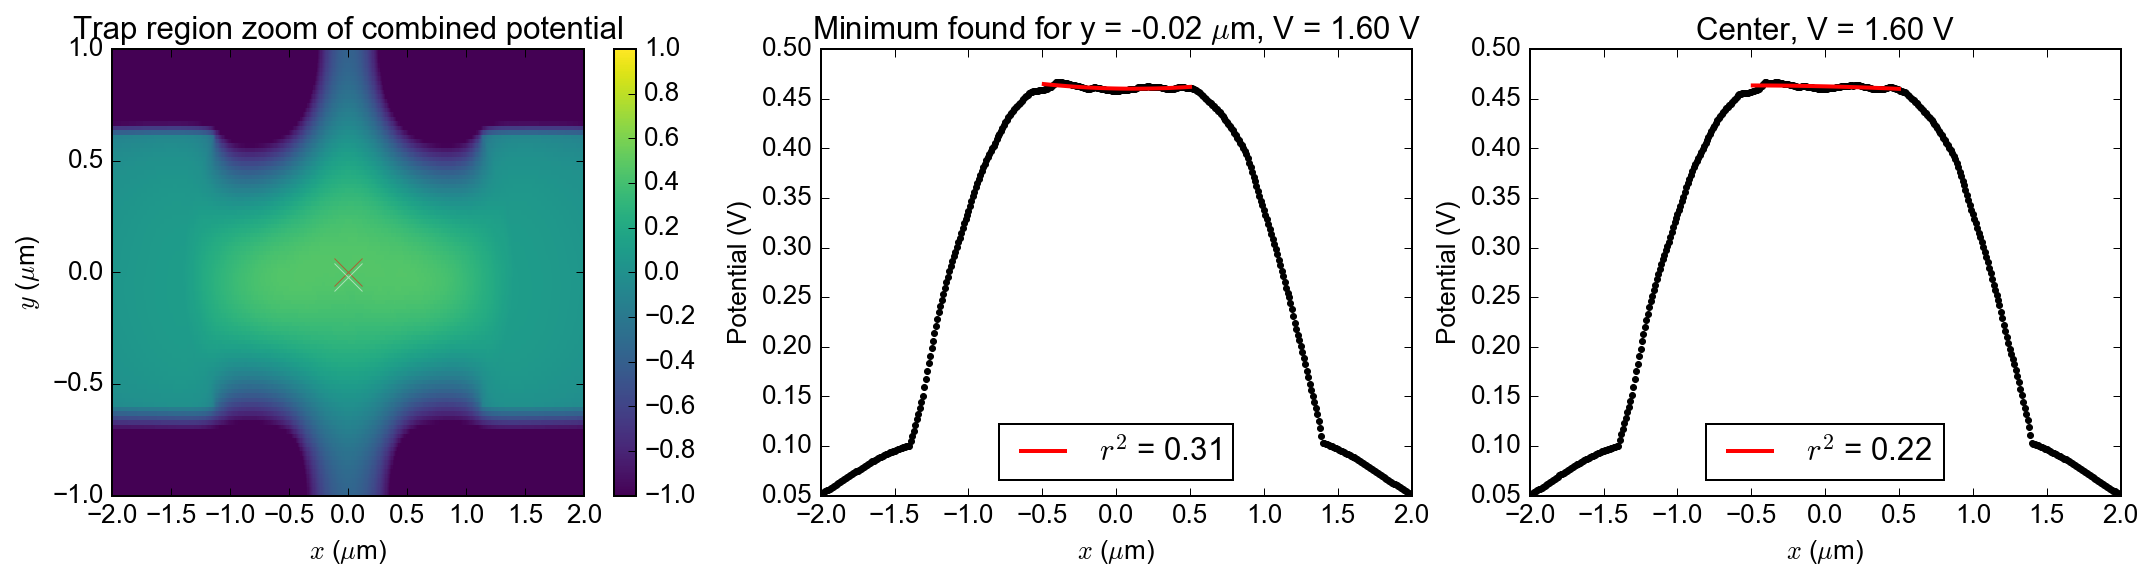

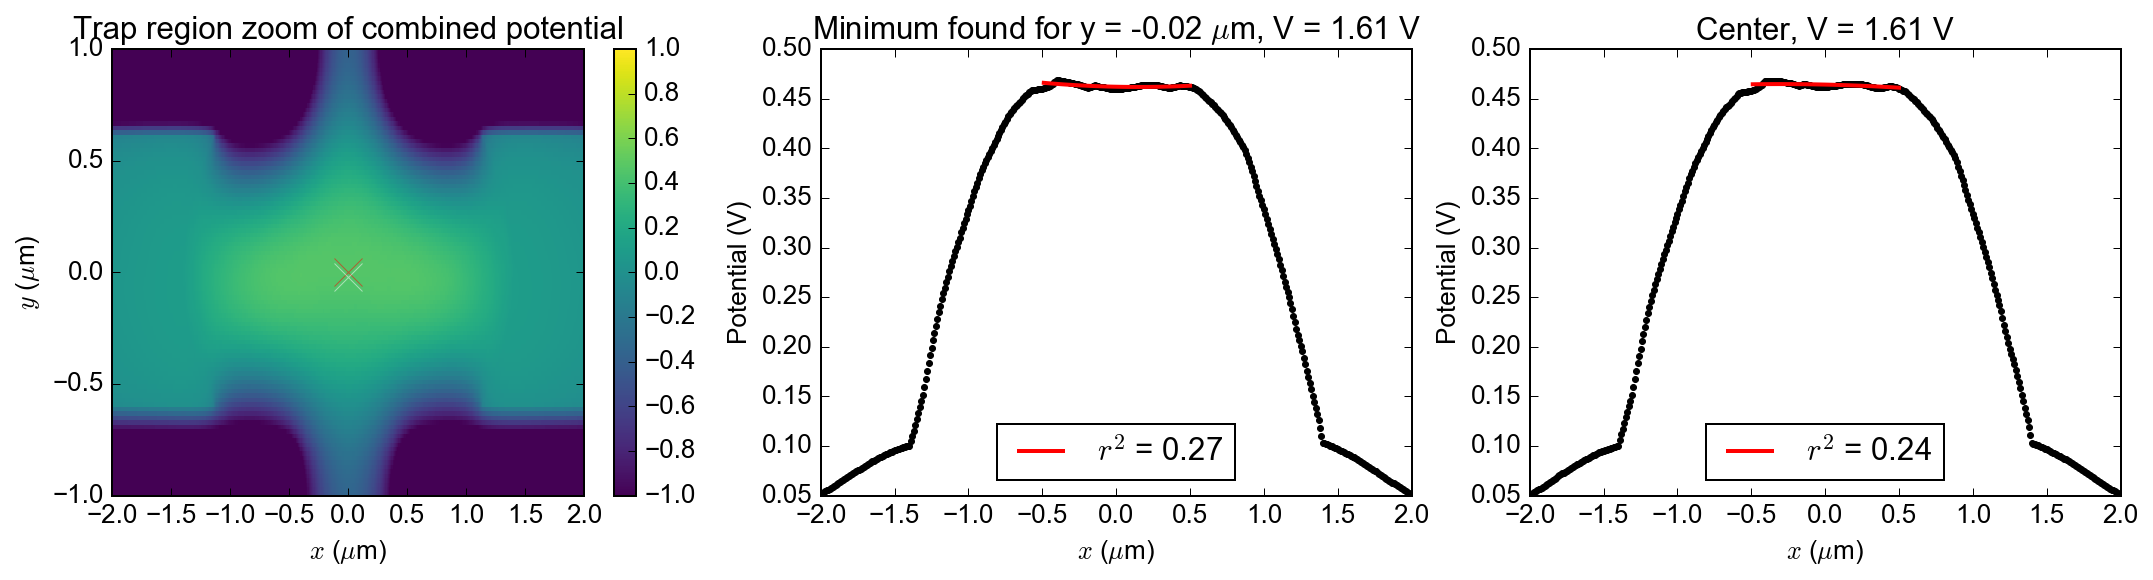

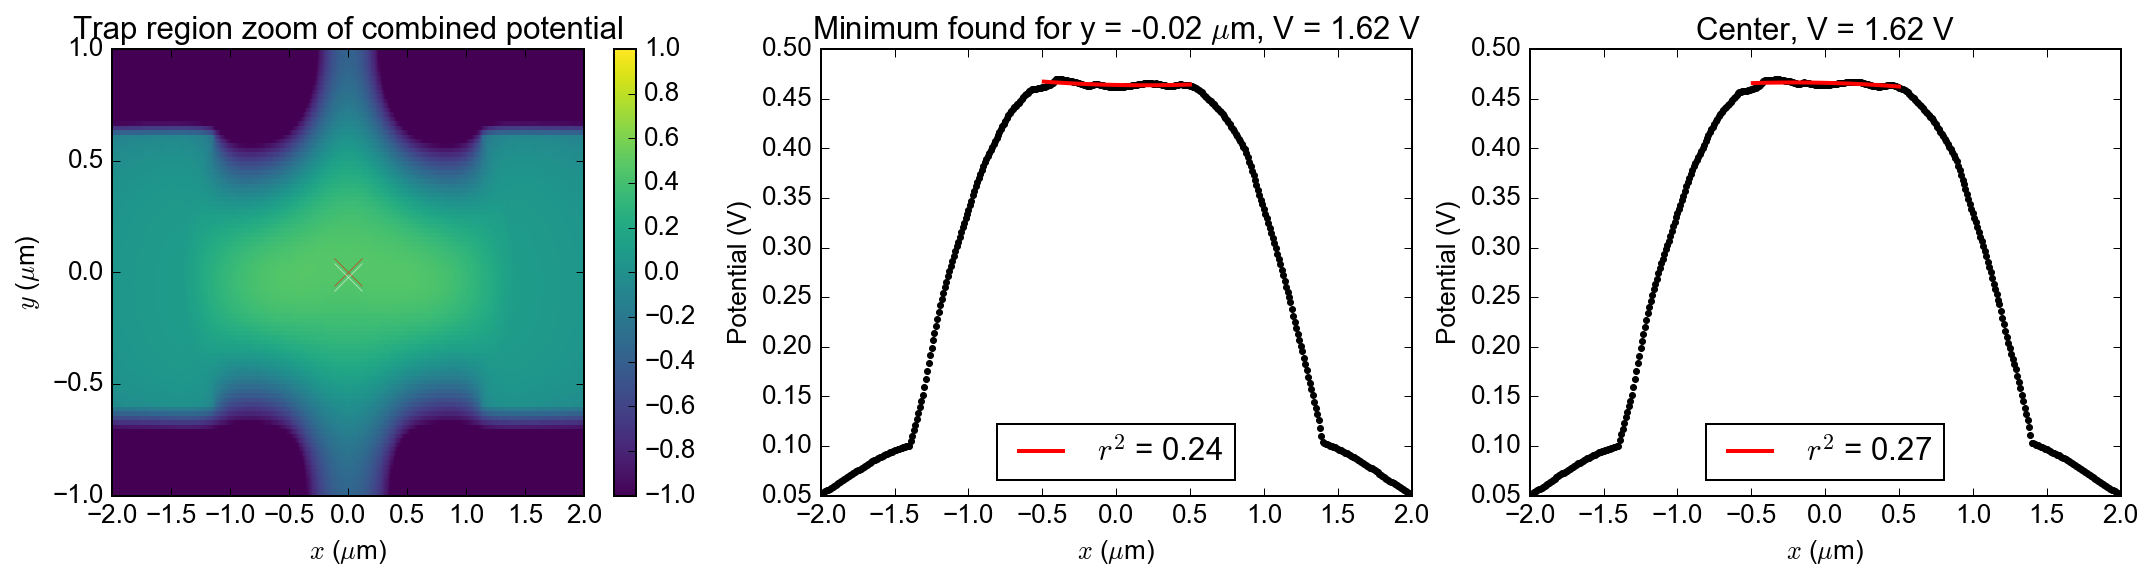

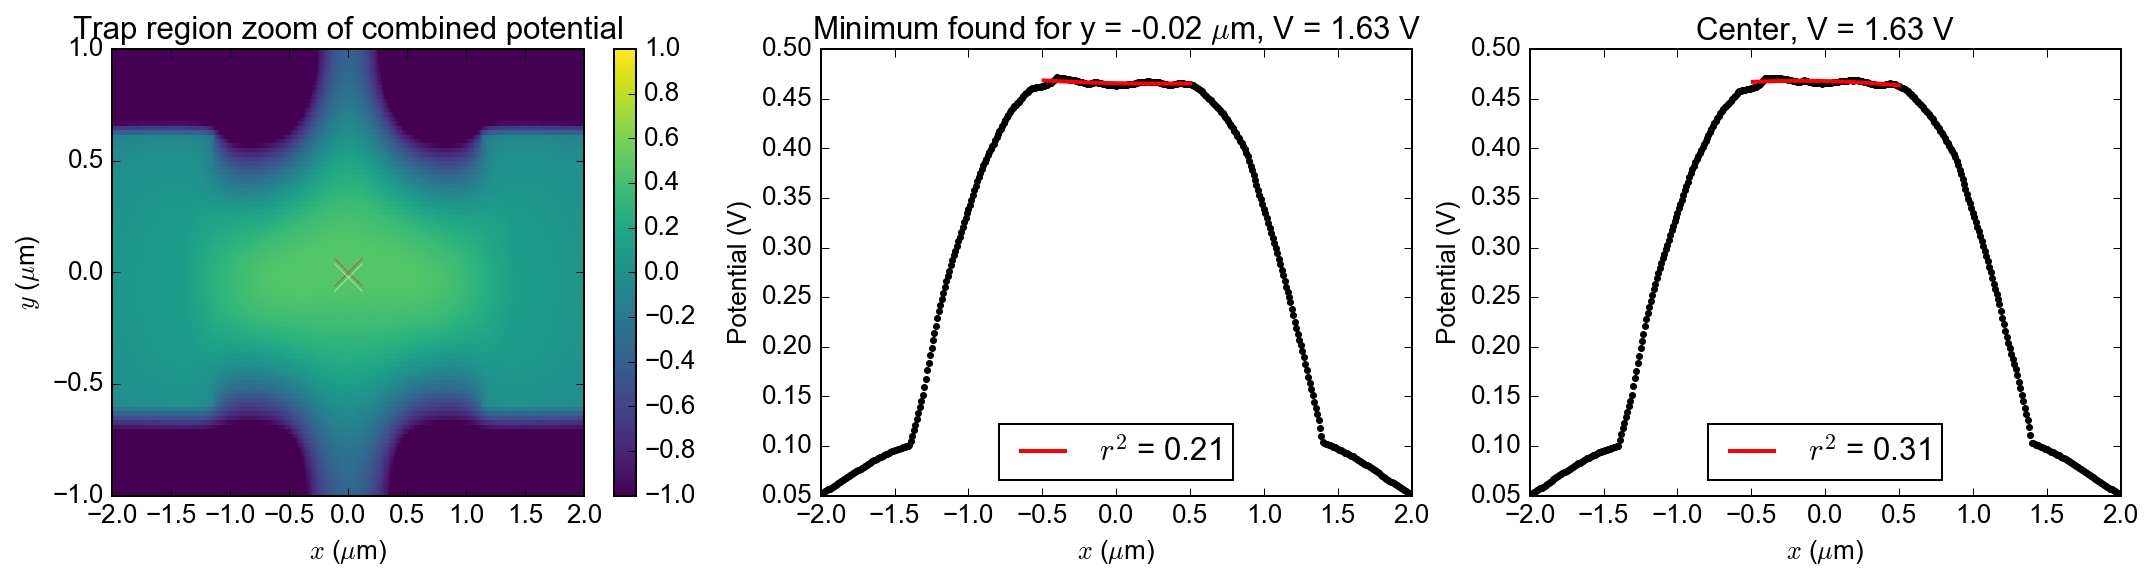

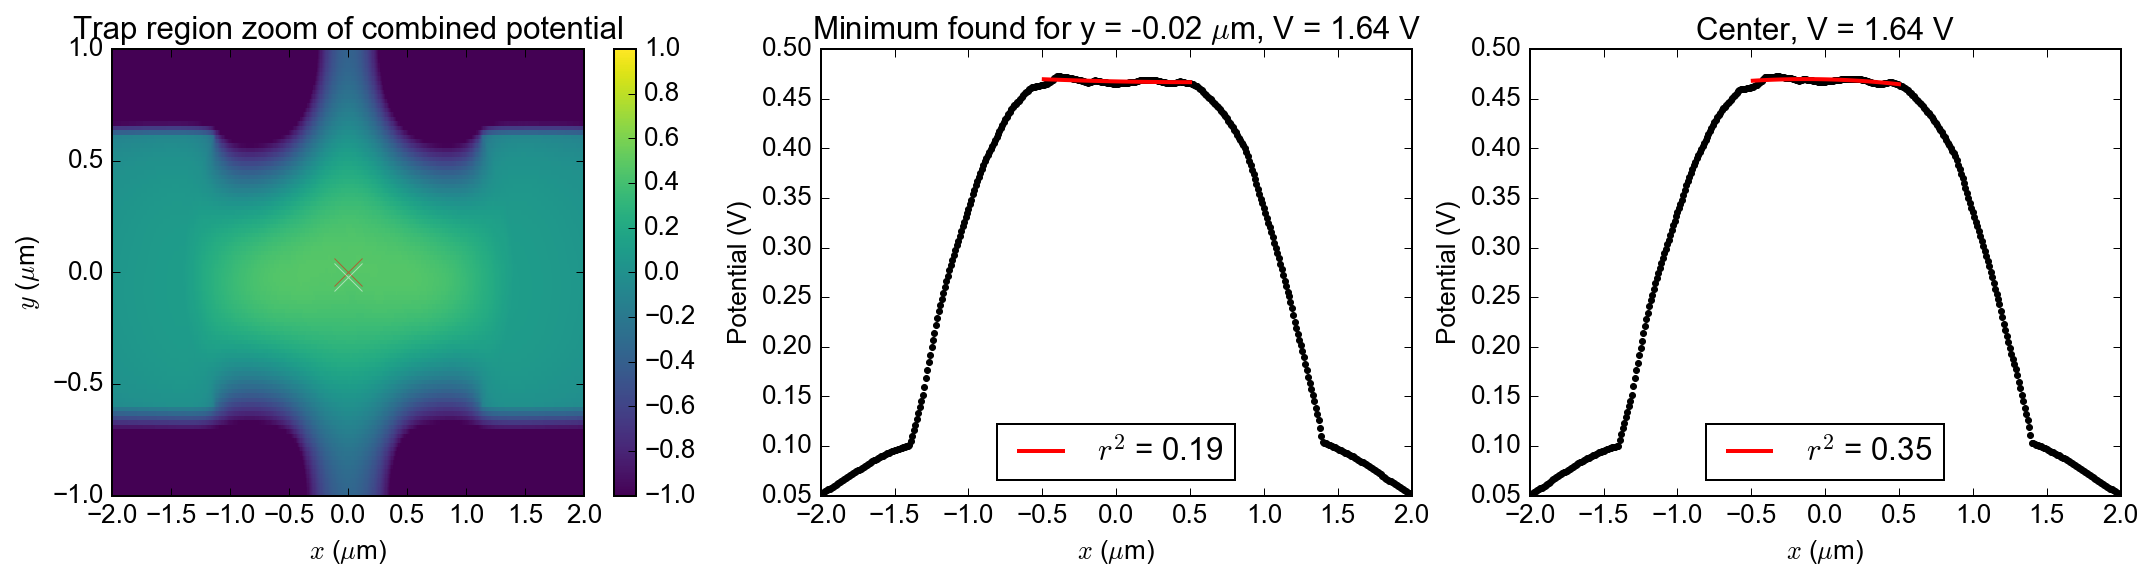

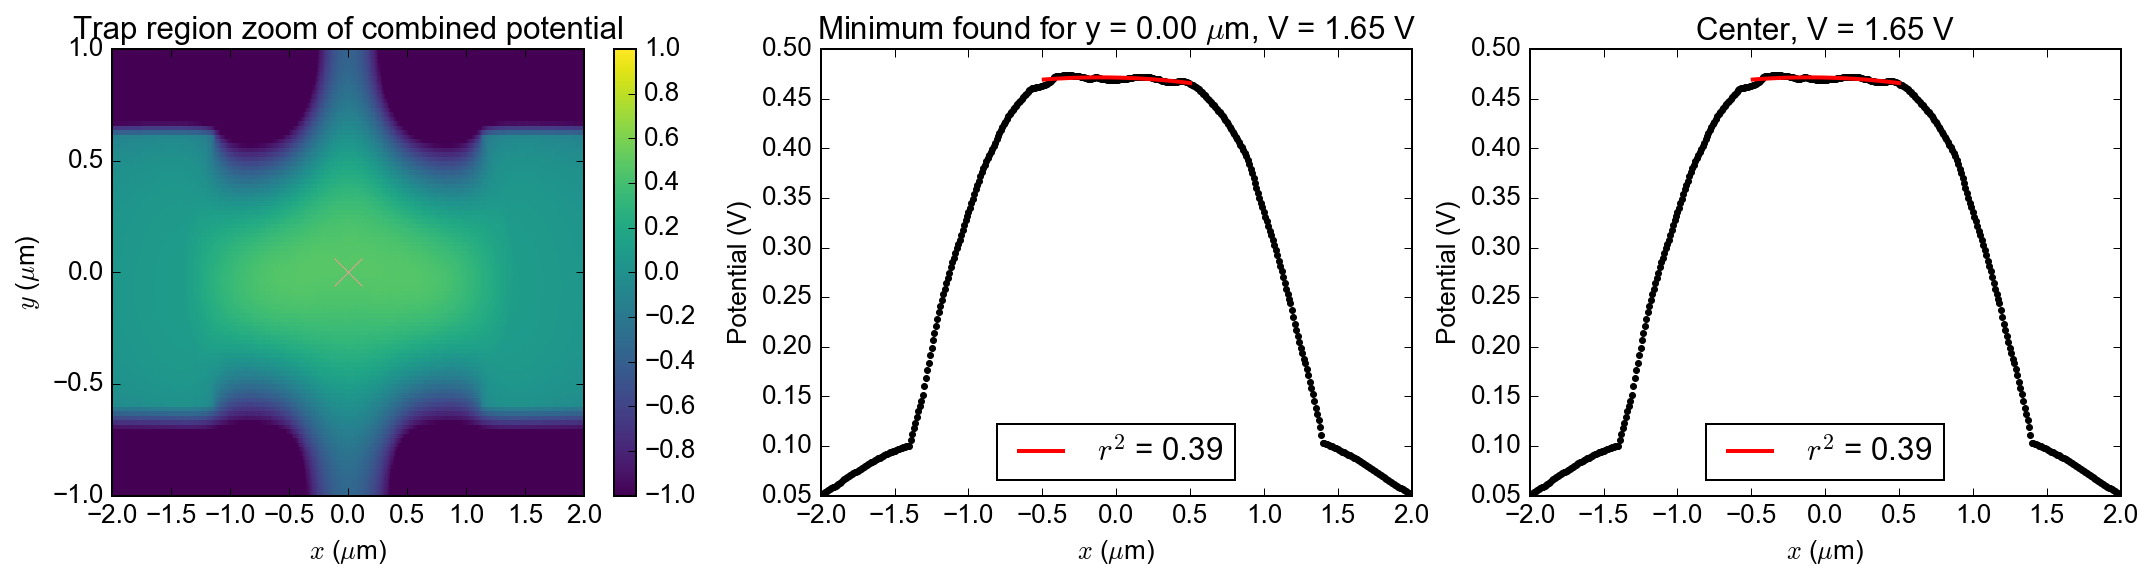

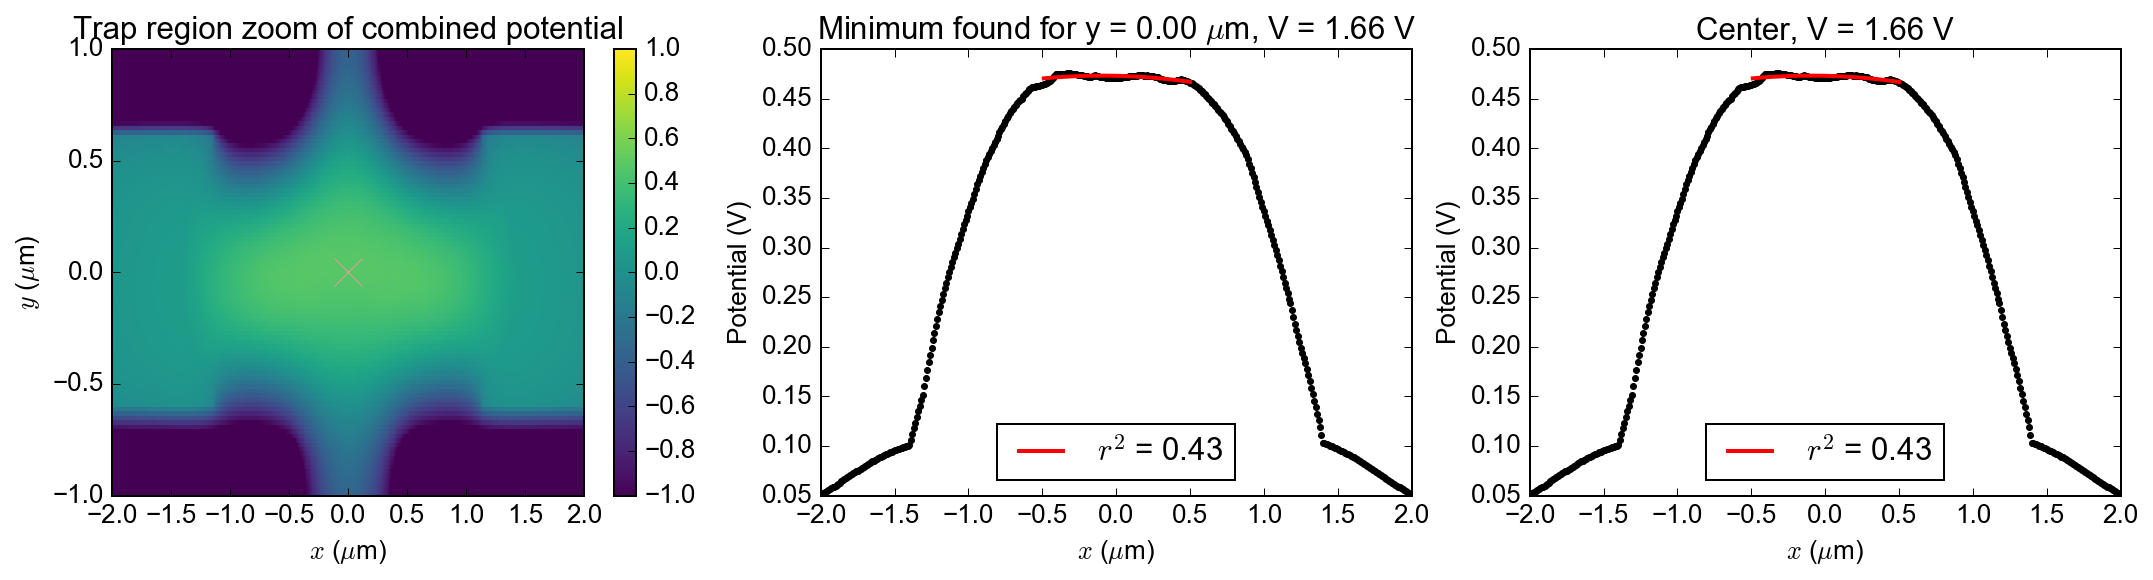

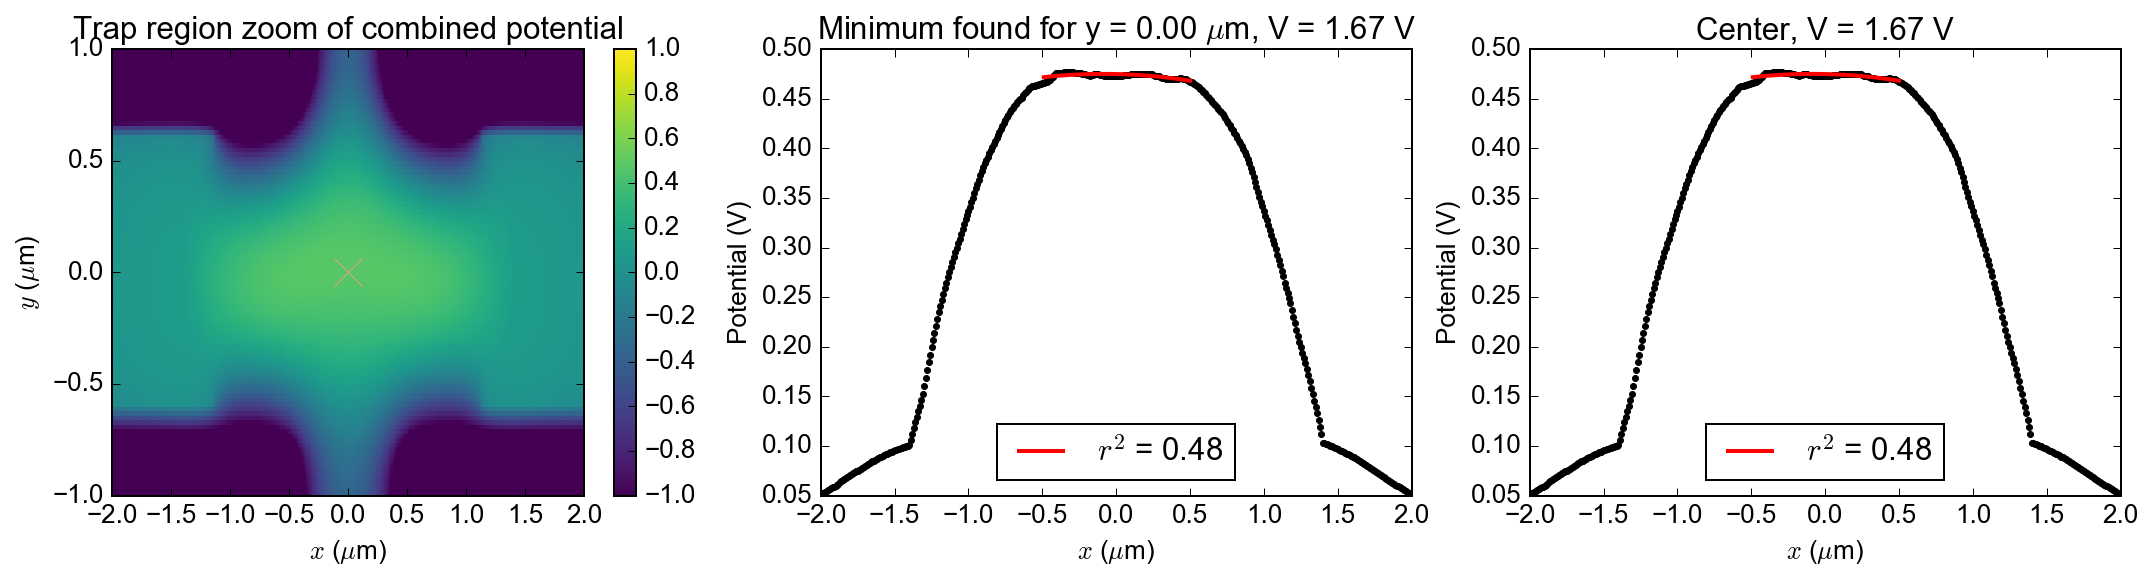

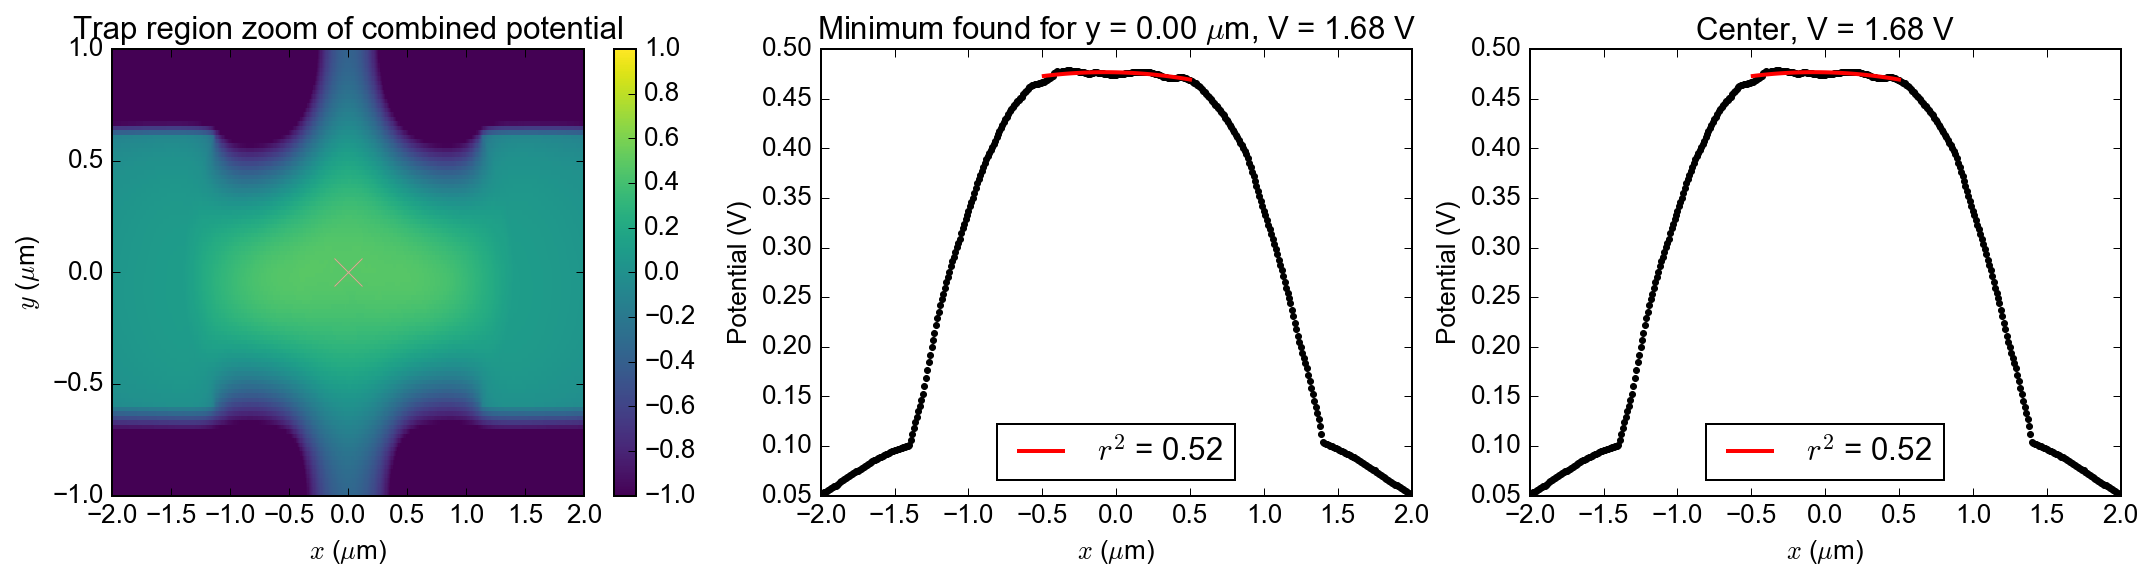

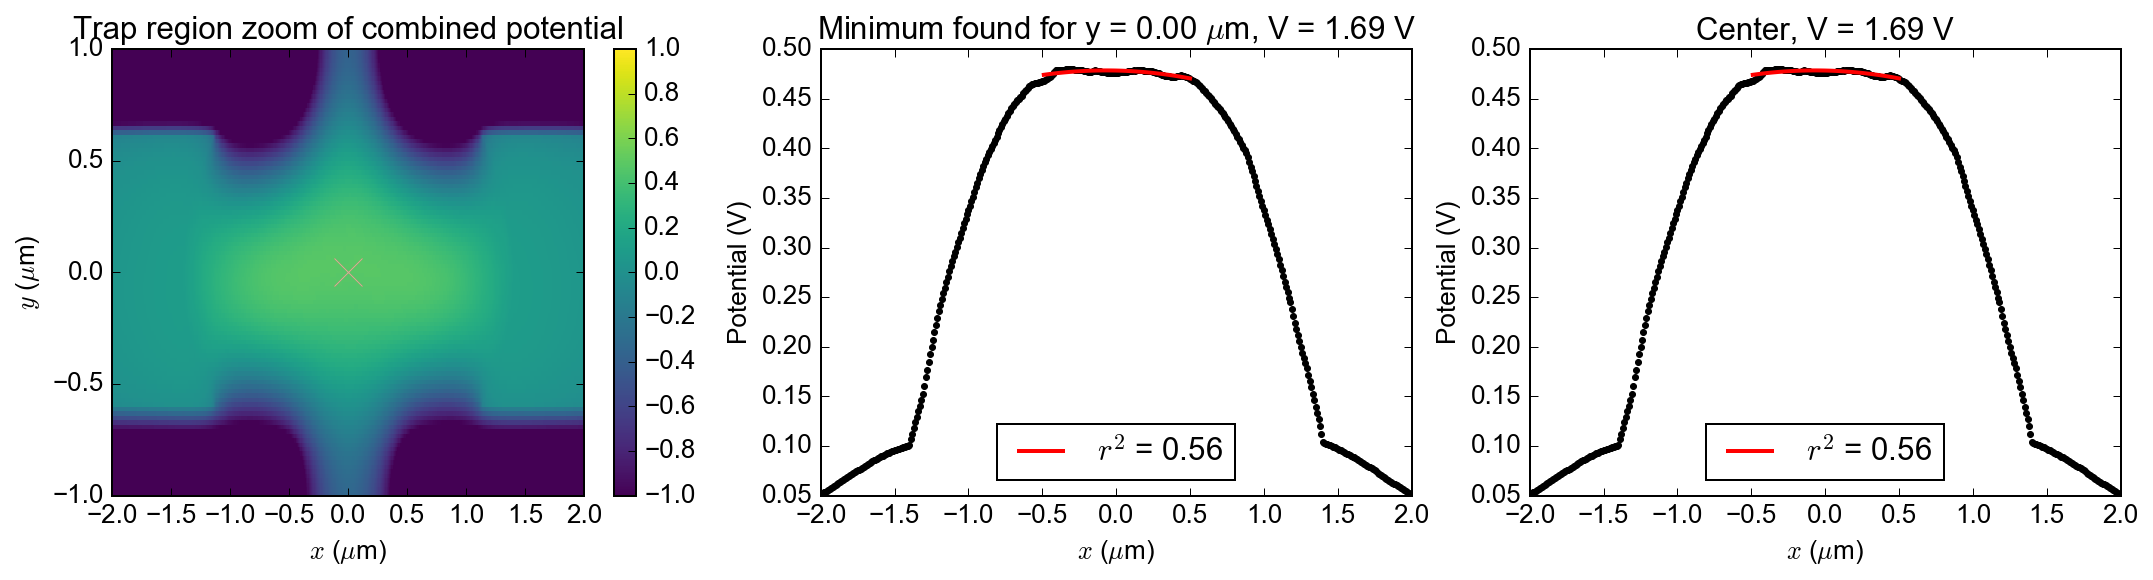

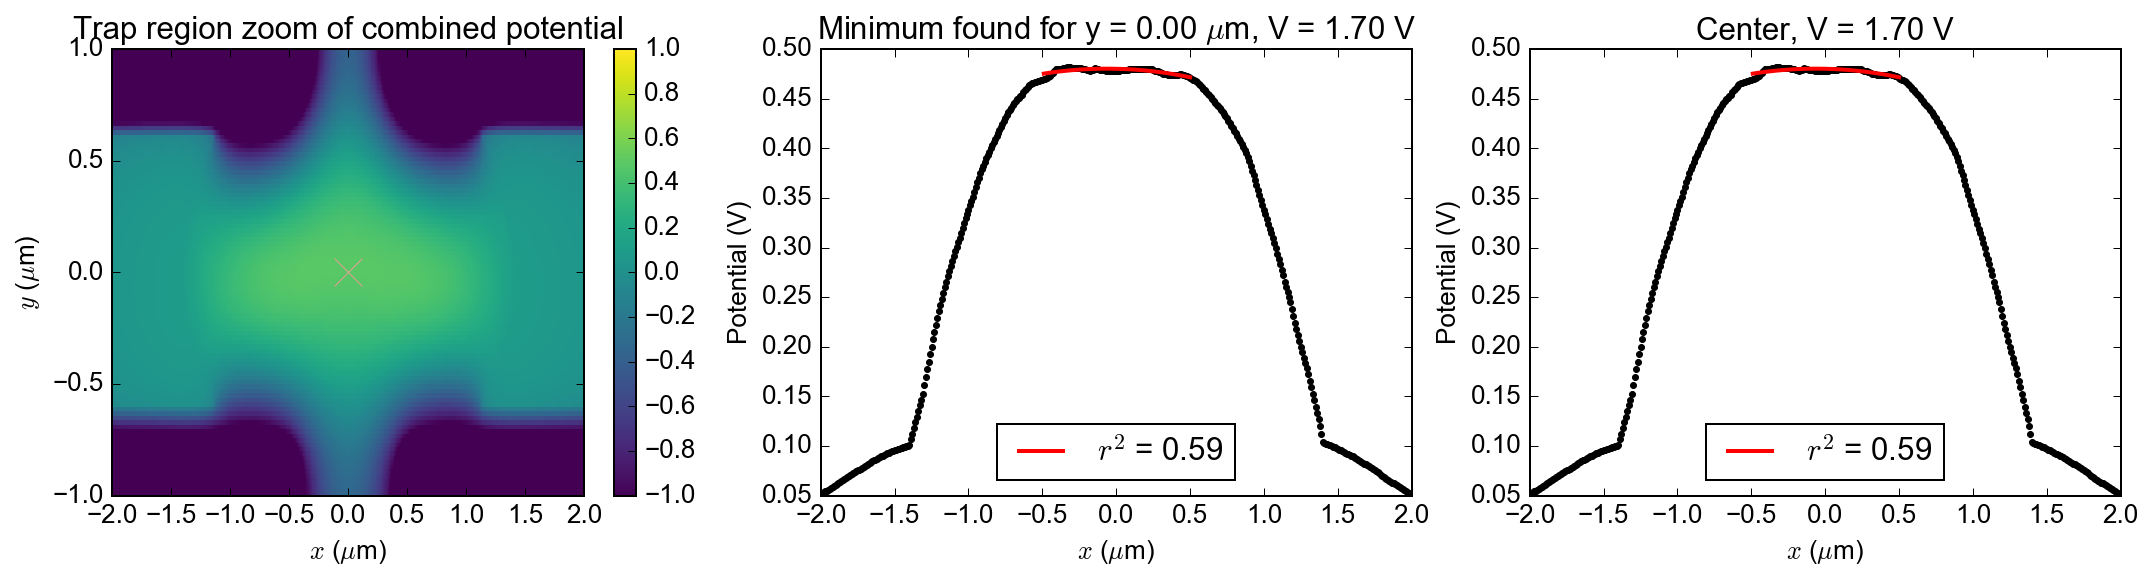

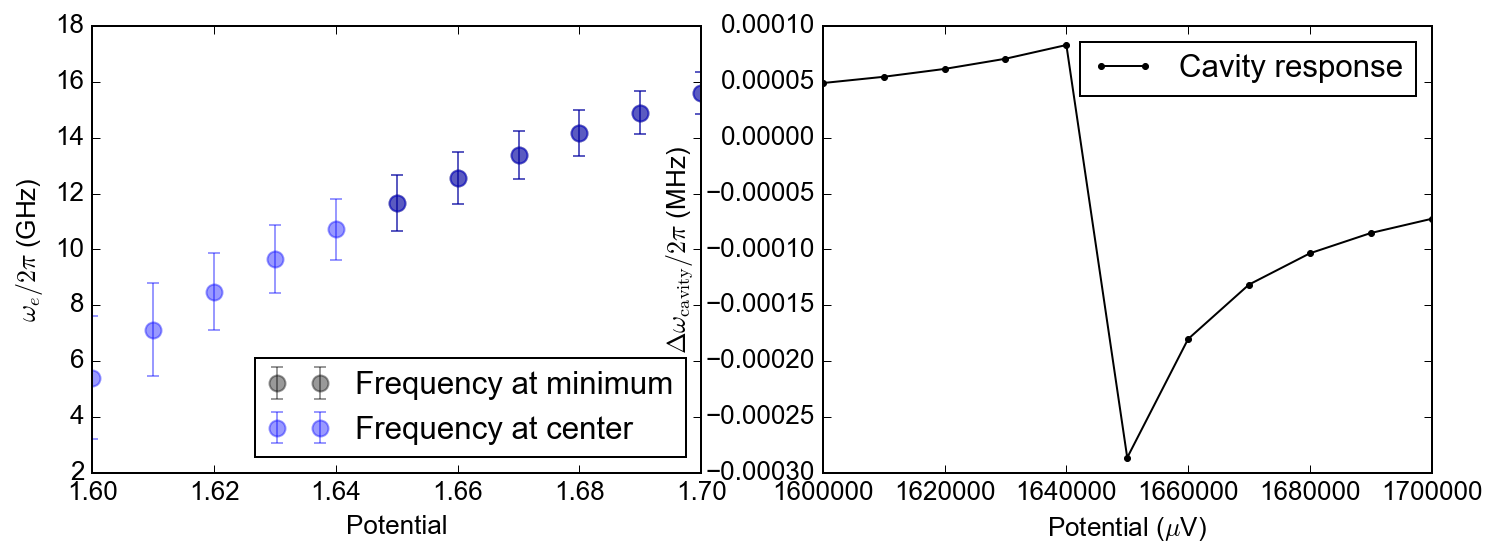

In [27]:
sweep_voltage = linspace(1.60, 1.70, 11)
coefficients = array([5.0, 3.0, -4.085, -3.0*0.8, 0])
cavity_props = {'P' : -80, 'f0' : 10E9, 'Q' : 1E4, 'beta' : 0.2433}
fmin, sigmamin, fctr, sigmactr = trap_analysis.sweep_electrode_voltage(x, y, cropped_potentials, coefficients, 
                                                                       sweep_voltage, sweep_electrode_idx=1, 
                                                                       fitdomain=(-0.5E-6, 0.5E-6), clim=(-1,1), 
                                                                       do_plot=True, print_report=True, 
                                                                       **cavity_props)